## Homework 6: Trees

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb

%matplotlib inline

## Preparing the dataset
Preparation:

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [3]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df.fillna(0, inplace=True)

In [7]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.fuel_efficiency_mpg.astype('int')
y_val = df_val.fuel_efficiency_mpg.astype('int')
y_test = df_test.fuel_efficiency_mpg.astype('int')

In [11]:
df_train.drop(columns=['fuel_efficiency_mpg'], inplace=True)
df_val.drop(columns=['fuel_efficiency_mpg'], inplace=True)
df_test.drop(columns=['fuel_efficiency_mpg'], inplace=True)

In [12]:
dv = DictVectorizer(sparse=True)

## Question 1
### Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

- 'vehicle_weight'
- 'model_year'
- 'origin'
- 'fuel_type'

In [13]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [14]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [15]:
feature_names = dv.get_feature_names_out()
feature_importance = dt.tree_.feature[0]
split_feature = feature_names[feature_importance]

In [16]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3033.82
|   |--- value: [16.34]
|--- vehicle_weight >  3033.82
|   |--- value: [12.40]



In [17]:
print(f'The feature used for splitting the data is: {split_feature}')

The feature used for splitting the data is: vehicle_weight


## Question 2 

Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

- 0.045
- 0.45
- 4.5
- 45.0

In [18]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE on the validation set is: {rmse:.2f}')

RMSE on the validation set is: 0.56


## Question 3

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [19]:
rmse_values = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append((n, rmse))

for n, rmse in rmse_values:
    print(f'n_estimators={n}: RMSE={rmse:.3f}')

n_estimators=10: RMSE=0.557
n_estimators=20: RMSE=0.544
n_estimators=30: RMSE=0.539
n_estimators=40: RMSE=0.536
n_estimators=50: RMSE=0.534
n_estimators=60: RMSE=0.534
n_estimators=70: RMSE=0.533
n_estimators=80: RMSE=0.533
n_estimators=90: RMSE=0.532
n_estimators=100: RMSE=0.533
n_estimators=110: RMSE=0.532
n_estimators=120: RMSE=0.531
n_estimators=130: RMSE=0.531
n_estimators=140: RMSE=0.530
n_estimators=150: RMSE=0.531
n_estimators=160: RMSE=0.531
n_estimators=170: RMSE=0.531
n_estimators=180: RMSE=0.531
n_estimators=190: RMSE=0.531
n_estimators=200: RMSE=0.531


In [20]:
df_scores = pd.DataFrame(rmse_values, columns=['n', 'rmse'])

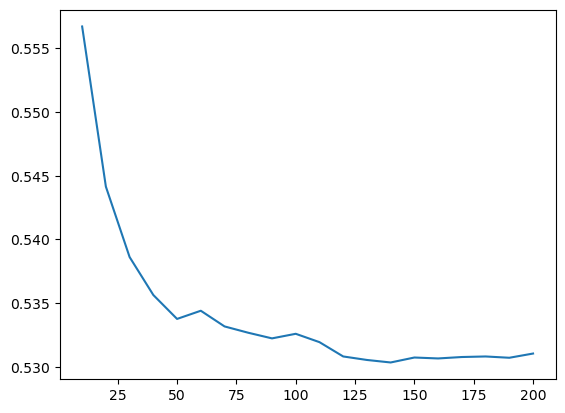

In [21]:
plt.plot(df_scores.n, df_scores.rmse)
plt.show()

## Question 4

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
  - try different values of n_estimators from 10 till 200 (with step 10)
  - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10 <--
- 15
- 20
- 25

In [22]:
mean_rmse_values = []

max_depth_values = [10, 15, 20, 25]

for max_depth in max_depth_values:
    rmse_per_depth = []
    
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_per_depth.append(rmse)
    
    mean_rmse = np.mean(rmse_per_depth)
    mean_rmse_values.append((max_depth, mean_rmse))

In [23]:
columns = ['max_depth', 'mean_rmse']
df_scores = pd.DataFrame(mean_rmse_values, columns=columns)
df_scores

,max_depth,mean_rmse
0,10,0.528661
1,15,0.533989
2,20,0.533762
3,25,0.534112


## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
  - n_estimators=10,
  - max_depth=20,
  - random_state=1,
  - n_jobs=-1 (optional)

- Get the feature importance information from this model

  
What's the most important feature (among these 4)?

- vehicle_weight <--
- horsepower
- acceleration
- engine_displacement

In [24]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = dv.feature_names_
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

selected_features = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']
filtered_importance_df = importance_df[importance_df['feature'].isin(selected_features)]
filtered_importance_df = filtered_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
filtered_importance_df

,feature,importance
0,vehicle_weight,0.949446
1,horsepower,0.017363
2,acceleration,0.013783
3,engine_displacement,0.005067


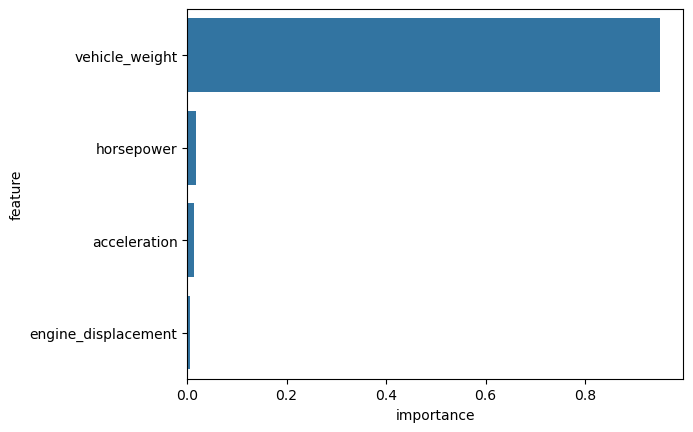

In [25]:
sns.barplot(x='importance', y='feature', data=filtered_importance_df)
plt.show()

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:
````
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
````
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1 <--
- Both give equal value

In [26]:
# create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [27]:
# parameters for model 1 - eta: 0.3
xgb_params1 = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# model 1 - eta: 0.3
model1 = xgb.train(xgb_params1, dtrain, num_boost_round=100, evals=watchlist)
y_pred1 = model1.predict(dval)
rmse1 = np.sqrt(mean_squared_error(y_val, y_pred1))
print(f"RMSE with eta=0.3: {rmse1:.3f}")

[0]	train-rmse:1.83241	val-rmse:1.87393
[1]	train-rmse:1.34588	val-rmse:1.37323
[2]	train-rmse:1.01739	val-rmse:1.04044
[3]	train-rmse:0.80244	val-rmse:0.82701
[4]	train-rmse:0.66474	val-rmse:0.69403
[5]	train-rmse:0.57927	val-rmse:0.61114
[6]	train-rmse:0.52791	val-rmse:0.56750
[7]	train-rmse:0.49770	val-rmse:0.54290
[8]	train-rmse:0.47727	val-rmse:0.53002
[9]	train-rmse:0.46525	val-rmse:0.52436
[10]	train-rmse:0.45545	val-rmse:0.52073
[11]	train-rmse:0.44848	val-rmse:0.52078
[12]	train-rmse:0.44237	val-rmse:0.52048
[13]	train-rmse:0.43798	val-rmse:0.51986
[14]	train-rmse:0.43218	val-rmse:0.51933
[15]	train-rmse:0.42822	val-rmse:0.52085
[16]	train-rmse:0.42531	val-rmse:0.52049
[17]	train-rmse:0.42420	val-rmse:0.52051
[18]	train-rmse:0.42142	val-rmse:0.52043
[19]	train-rmse:0.41802	val-rmse:0.52041
[20]	train-rmse:0.41585	val-rmse:0.52026
[21]	train-rmse:0.41317	val-rmse:0.52092
[22]	train-rmse:0.41055	val-rmse:0.52123
[23]	train-rmse:0.40871	val-rmse:0.52191
[24]	train-rmse:0.40663	va

In [28]:
# parameters for model 2 - eta: 0.1
xgb_params2 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Train for 100 rounds
model2 = xgb.train(xgb_params2, dtrain, num_boost_round=100, evals=watchlist)

y_pred2 = model2.predict(dval)
rmse2 = np.sqrt(mean_squared_error(y_val, y_pred2))
print(f"RMSE with eta=0.1: {rmse2:.3f}")

[0]	train-rmse:2.30296	val-rmse:2.36301
[1]	train-rmse:2.08948	val-rmse:2.14249
[2]	train-rmse:1.89829	val-rmse:1.94475
[3]	train-rmse:1.72694	val-rmse:1.76778
[4]	train-rmse:1.57411	val-rmse:1.61006
[5]	train-rmse:1.43716	val-rmse:1.46923
[6]	train-rmse:1.31541	val-rmse:1.34505
[7]	train-rmse:1.20678	val-rmse:1.23387
[8]	train-rmse:1.11037	val-rmse:1.13636
[9]	train-rmse:1.02513	val-rmse:1.04964
[10]	train-rmse:0.94974	val-rmse:0.97408
[11]	train-rmse:0.88346	val-rmse:0.90800
[12]	train-rmse:0.82491	val-rmse:0.84964
[13]	train-rmse:0.77372	val-rmse:0.79953
[14]	train-rmse:0.72901	val-rmse:0.75606
[15]	train-rmse:0.69001	val-rmse:0.71859
[16]	train-rmse:0.65582	val-rmse:0.68715
[17]	train-rmse:0.62641	val-rmse:0.65870
[18]	train-rmse:0.60076	val-rmse:0.63480
[19]	train-rmse:0.57856	val-rmse:0.61427
[20]	train-rmse:0.55963	val-rmse:0.59757
[21]	train-rmse:0.54282	val-rmse:0.58330
[22]	train-rmse:0.52900	val-rmse:0.57219
[23]	train-rmse:0.51691	val-rmse:0.56222
[24]	train-rmse:0.50618	va